# Analítica computacional para la toma de decisiones

Departamento de Ingeniería Industrial

Universidad de los Andes

## Exploración de datos en python

### Importar Libraries

In [4]:
import numpy as np
import pandas as pd

### Importar Dataset

In [24]:
df = pd.read_csv('.\\BikePrices.csv')


In [6]:
df.shape

(1061, 8)

In [7]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [8]:
df["Owner"].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [9]:
df.groupby(["Brand"]).count()

,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
Brand,,,,,,,
Activa,3,3,3,3,3,3,3
Aprilia,2,2,2,2,2,2,0
BMW,1,1,1,1,1,1,1
Bajaj,260,260,260,260,260,260,143
Benelli,1,1,1,1,1,1,1
Harley,2,2,2,2,2,2,2
Hero,232,232,232,232,232,232,108
Honda,204,204,204,204,204,204,170
Hyosung,1,1,1,1,1,1,1


In [10]:
df["Brand"].value_counts()

Brand
Bajaj       260
Hero        232
Honda       204
Royal       109
Yamaha      102
TVS          69
Suzuki       30
KTM          24
Mahindra      6
Kawasaki      4
Vespa         4
UM            3
Jawa          3
Activa        3
Harley        2
Aprilia       2
Yo            1
Benelli       1
Hyosung       1
BMW           1
Name: count, dtype: int64

In [11]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [12]:
# número de clientes perdido y no perdidosn
counts = df.Brand.value_counts()
perc_churn = (counts.iloc[1] / (counts.iloc[0] + counts.iloc[1])) * 100
print(f'Churn Rate = {perc_churn:.1f}%')

Churn Rate = 47.2%


In [13]:
# número de duplicados
duplicates = len(df[df.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')

Number of Duplicate Entries: 6


In [14]:
ff=df[df.duplicated]
print(ff)

     Brand                     Model  Selling_Price  Year Seller_Type  \
66   Honda  Honda Activa [2000-2015]          23000  2009  Individual   
266  Bajaj       Bajaj Pulsar 135 LS          20000  2010  Individual   
460   Hero  Hero Karizma [2003-2014]          50000  2013  Individual   
479  Honda      Honda CB Hornet 160R          70000  2017  Individual   
724    TVS     TVS Apache RTR 200 4V          95000  2018  Individual   
854  Bajaj         Bajaj Platina 100          20000  2012  Individual   

         Owner  KM_Driven  Ex_Showroom_Price  
66   1st owner      95000            50267.0  
266  1st owner      80000            64589.0  
460  1st owner      38000            85766.0  
479  1st owner      35000            87719.0  
724  1st owner       9600                NaN  
854  1st owner      16295                NaN  


In [15]:
# número de valores perdidos
missing_values = df.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')

Number of Missing Values: 435


In [22]:
# Tipos de datos en el dataset
types = df.dtypes#.value_counts()

print('Number of Features: %d'%(df.shape[1]))
print('Number of Customers: %d'%(df.shape[0]))
print('Data Types and Frequency in Dataset:')
print(types)

Number of Features: 306
Number of Customers: 1061
Data Types and Frequency in Dataset:
Selling_Price                         int64
Year                                  int64
Owner                               float64
KM_Driven                             int64
Ex_Showroom_Price                   float64
                                     ...   
Model_Yamaha YZF R15 [2011-2018]       bool
Model_Yamaha YZF R3                    bool
Model_Yo Style                         bool
Seller_Type_Dealer                     bool
Seller_Type_Individual                 bool
Length: 306, dtype: object


## Pre-Processing

In [25]:
# Conversión de características
df['Owner'] = df['Owner'].map({'1st owner': 1, '2nd owner': 2 , '3th owner': 3 , '4th owner': 4})
print(df)

      Brand                      Model  Selling_Price  Year Seller_Type  \
0       TVS                 TVS XL 100          30000  2017  Individual   
1     Bajaj              Bajaj  ct 100          18000  2017  Individual   
2        Yo                   Yo Style          20000  2011  Individual   
3     Bajaj         Bajaj Discover 100          25000  2010  Individual   
4     Bajaj         Bajaj Discover 100          24999  2012  Individual   
...     ...                        ...            ...   ...         ...   
1056  Royal  Royal Enfield Electra 5 S          90000  2012  Individual   
1057   Hero            Hero Honda Hunk          20000  2010  Individual   
1058  Bajaj     Bajaj Pulsar 220 DTS-i          60000  2014  Individual   
1059   Hero     Hero Honda CBZ extreme          40000  2009  Individual   
1060   Hero     Hero Honda CBZ extreme          35000  2012  Individual   

      Owner  KM_Driven  Ex_Showroom_Price  
0       1.0       8000            30490.0  
1       1.0

In [18]:
catcols = df.select_dtypes(exclude = ['int64','float64']).columns
intcols = df.select_dtypes(include = ['int64']).columns
floatcols = df.select_dtypes(include = ['float64']).columns

# codificación 
df = pd.get_dummies(df, columns = catcols)
   
print('New Number of Features: %d'%(df.shape[1]))  

New Number of Features: 306


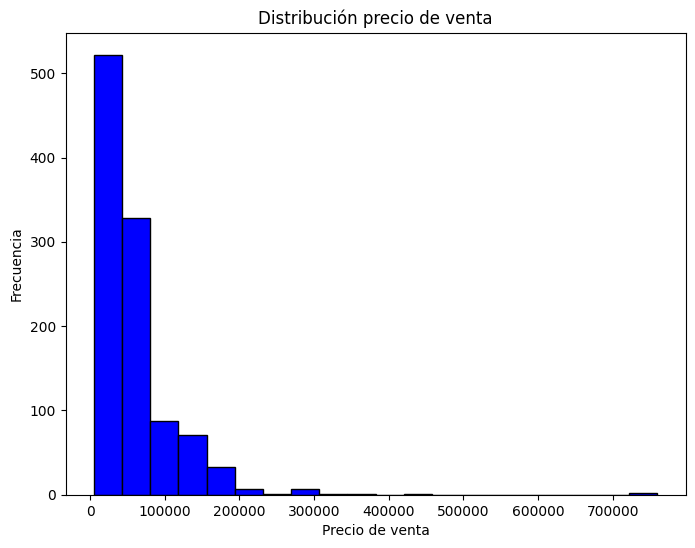

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  
plt.hist(df['Selling_Price'], bins=20, color='blue', edgecolor='black')  
plt.title('Distribución precio de venta') 
plt.xlabel('Precio de venta') 
plt.ylabel('Frecuencia')  
plt.show()  
